# Load data in tf.keras.datasets

In [106]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [107]:
(train_data, train_label) , (test_data, test_label) = fashion_mnist.load_data()

In [108]:
train_data[0].shape, train_label[0].shape

((28, 28), ())

In [109]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [110]:
import matplotlib.pyplot as plt
import random

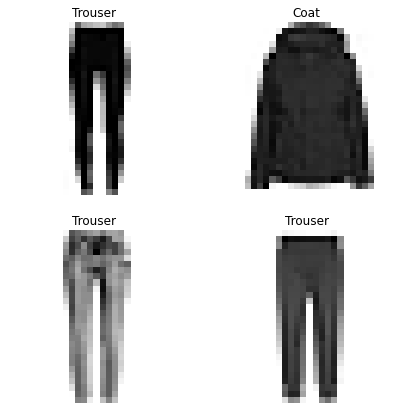

In [111]:
# Visualize image
plt.figure(figsize=(7,7))
for i in range(4):
  plt.subplot(2,2, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap= plt.cm.binary)
  plt.title(class_name[train_label[random_index]])
  plt.axis(False)
  

In [112]:
# Scaling train_data & test_data
train_data = train_data/255.
test_data = test_data/255.

In [113]:
train_data.min(), train_data.max()

(0.0, 1.0)

# Build model

In [114]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "softmax")
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [115]:
model = model.fit(train_data,
                  train_label,
                  epochs = 5,
                  validation_data = (test_data, test_label),
                  )

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881


## Plot loss curve

In [116]:
def plot_loss_curse(model):

  acc = model.history["accuracy"]
  val_acc = model.history["val_accuracy"]

  loss = model.history["loss"]
  val_loss = model.history["val_loss"]

  epochs = range(len(model.history["loss"]))

  plt.plot(epochs, acc, label ="Training_Accuracy" )
  plt.plot(epochs, val_acc, label="Val_Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, loss, label ="Training_Loss" )
  plt.plot(epochs, val_loss, label="Val_Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

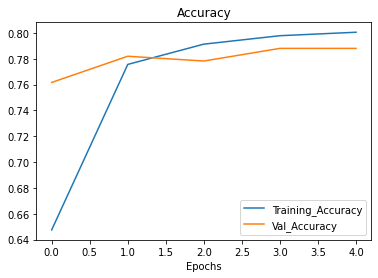

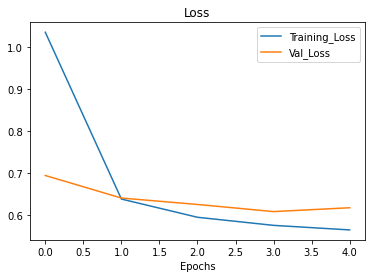

In [117]:
plot_loss_curse(model)

# Improve Model
- Using Model Callbacks find learning rate
- Train for longer epochs

In [118]:
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

In [119]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [120]:
model2_improve = model2.fit(train_data,
                            train_label,
                            epochs = 40,
                            validation_data = (test_data, test_label),
                            callbacks = [scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7023 - accuracy: 0.7552 - val_loss: 0.6633 - val_accuracy: 0.7650
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6127 - accuracy: 0.7889 - val_loss: 0.6119 - val_accuracy: 0.7871
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5765 - accuracy: 0.7993 - val_loss: 0.5886 - val_accuracy: 0.7972
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5570 - accuracy: 0.8056 - val_loss: 0.5806 - val_accuracy: 0.7916
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5400 - accuracy: 0.8106 - val_loss: 0.5792 - val_accuracy: 0.7973
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5304 - accuracy: 0.8130 - val_loss: 0.5443 - val_accuracy:

## Plot learning rate vs loss

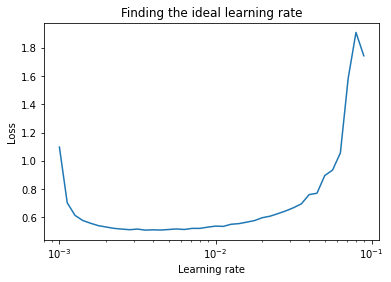

In [121]:
import numpy as np
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, model2_improve.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

## Fit model with idea learning rate

In [122]:
tf.random.set_seed(42)
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(0.001),
               metrics =["accuracy"])

In [123]:
model3_idea_lrs = model3.fit(train_data,
                             train_label,
                             epochs = 20,
                             validation_data = (test_data, test_label))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [124]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Plot loss curve model idea learning rate

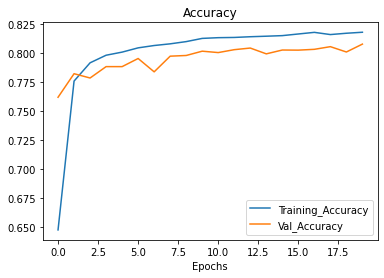

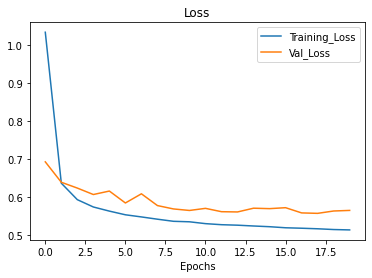

In [125]:
plot_loss_curse(model3_idea_lrs)

## Make prediction

In [126]:
probs = model3.predict(test_data)
probs[:5]

array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

In [127]:
# See the first example
probs[0].argmax(), class_name[probs[0].argmax()]

(9, 'Ankle boot')

In [128]:
# Convert all to label
preds = probs.argmax(axis=1)
preds[:5]

array([9, 2, 1, 1, 6])

In [129]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(y_true=test_label,
                 y_pred = preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

## Visualize result

In [131]:
def plot_random_image(model, images, label, classname):
  index = random.randint(0, len(images))
  image = images[i]
  probs = model3.predict(image.reshape(1,28,28))
  pred_label = classname[probs.argmax()]
  true_label = label[i]

  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(f"Predict: {pred_label} => True: {classname[true_label]}, Predict: {tf.round(100*tf.reduce_max(probs), 2)}%")

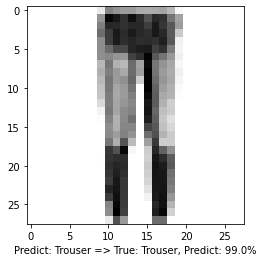

In [132]:
plot_random_image(model = model3, 
                  images = test_data,
                  label = test_label,
                  classname = class_name)

# Save Model

In [135]:
# Save in google drive
import os
save_dir = "/content/drive/MyDrive/tensorflow_project/ANN/fashion_mnist-tf-NN"

model3.save(save_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tensorflow_project/ANN/fashion_mnist-tf-NN/assets
